<a href="https://colab.research.google.com/github/shrut9/ecommerce_transaction_dataset/blob/main/FirstName_LastName_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score


In [ ]:
customers = pd.read_csv('/content/Customers.csv')
products = pd.read_csv('/content/Products.csv')
transactions = pd.read_csv('/content/Transactions.csv')

In [ ]:
print(customers.info())
print(products.info())
print(transactions.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

**Handling Missing Values**

In [ ]:
customers.fillna('Unknown', inplace=True)
transactions.fillna(0, inplace=True)


In [ ]:
print(customers.describe())
print(products.describe())
print(transactions.describe())

       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


Top Products by Sales

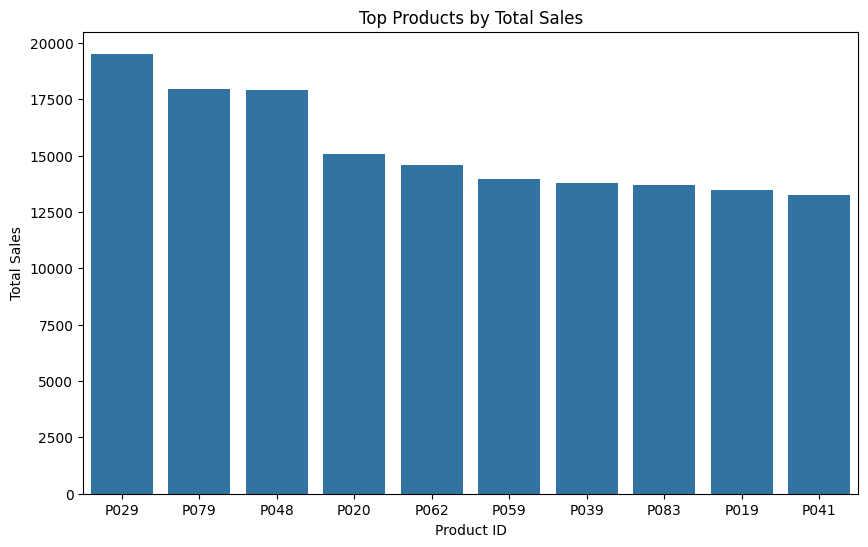

In [ ]:
top_products = transactions.groupby('ProductID')['TotalValue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.index, y=top_products.values)
plt.title('Top Products by Total Sales')
plt.xlabel('Product ID')
plt.ylabel('Total Sales')
plt.show()

Number of customers by Region

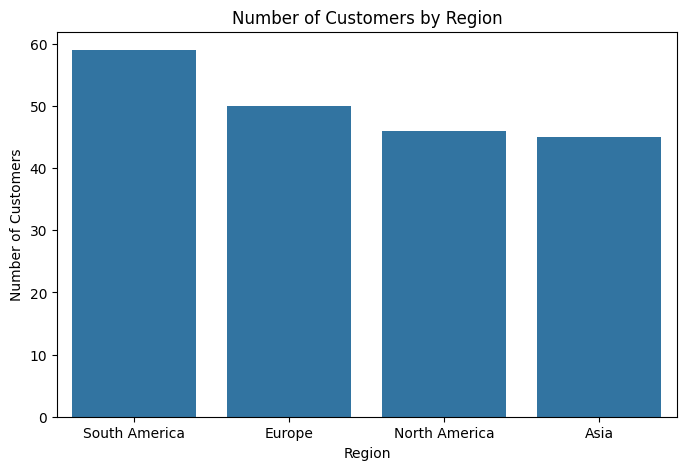

In [ ]:
customers_by_region = customers['Region'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=customers_by_region.index, y=customers_by_region.values)
plt.title('Number of Customers by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()

Seasonal Trends in Transactions  

In [ ]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [ ]:
transactions['Month'] = transactions['TransactionDate'].dt.month

In [ ]:
monthly_sales = transactions.groupby('Month')['TotalValue'].sum().sort_values(ascending=False)


<ipython-input-12-a72a52180429>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette='viridis')


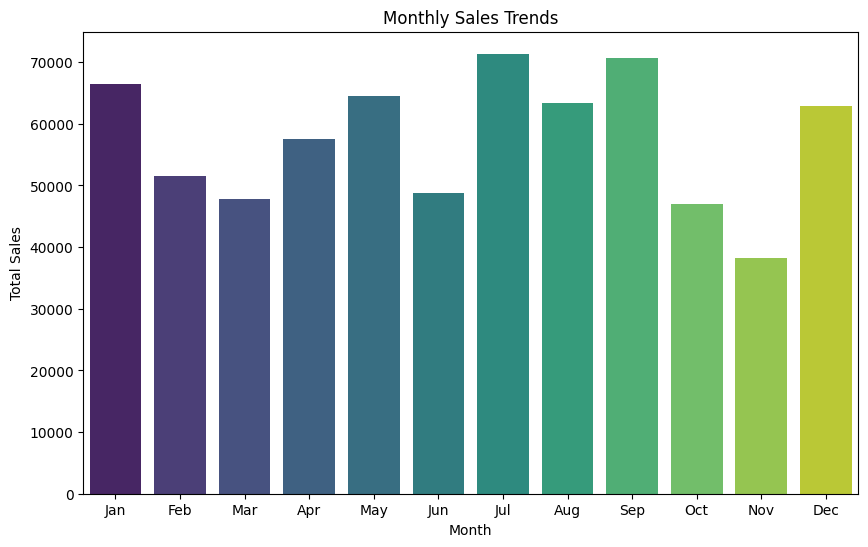

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette='viridis')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


Frequency of Repeat Purchases

In [ ]:
customer_transactions = transactions.groupby('CustomerID')['TransactionID'].count()


In [ ]:
repeat_customers = customer_transactions[customer_transactions > 1].count()
one_time_customers = customer_transactions[customer_transactions == 1].count()

In [ ]:
total_customers = len(customer_transactions)
repeat_percentage = (repeat_customers / total_customers) * 100
one_time_percentage = (one_time_customers / total_customers) * 100

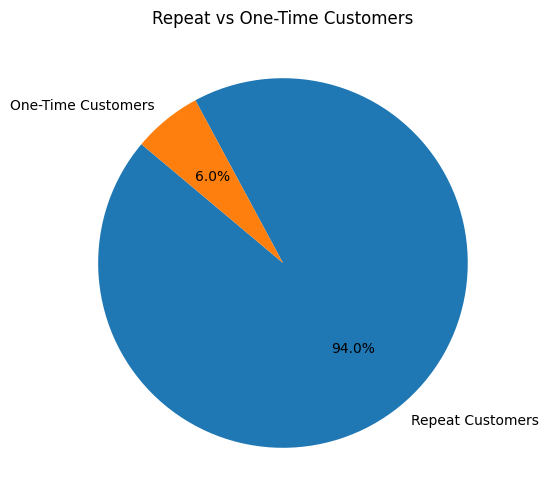

In [ ]:
plt.figure(figsize=(6, 6))
labels = ['Repeat Customers', 'One-Time Customers']
sizes = [repeat_percentage, one_time_percentage]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#1f77b4', '#ff7f0e'])
plt.title('Repeat vs One-Time Customers')
plt.show()


Product Price & Purchase Behavior

In [ ]:
bins = [0, 20, 50, 100, 200, 500,1000]
labels = ['0-20', '20-50', '50-100', '100-200', '200-500', '500-1000']
products['PriceRange'] = pd.cut(products['Price'], bins=bins, labels=labels)

In [ ]:
transactions = transactions.merge(products[['ProductID', 'PriceRange']], on='ProductID', how='left')

In [ ]:
price_range_sales = transactions.groupby('PriceRange')['TotalValue'].sum().sort_values(ascending=False)

<ipython-input-28-c5fc58ee0118>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_range_sales = transactions.groupby('PriceRange')['TotalValue'].sum().sort_values(ascending=False)


<ipython-input-29-0a361e1f20f6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=price_range_sales.index, y=price_range_sales.values, palette='plasma')


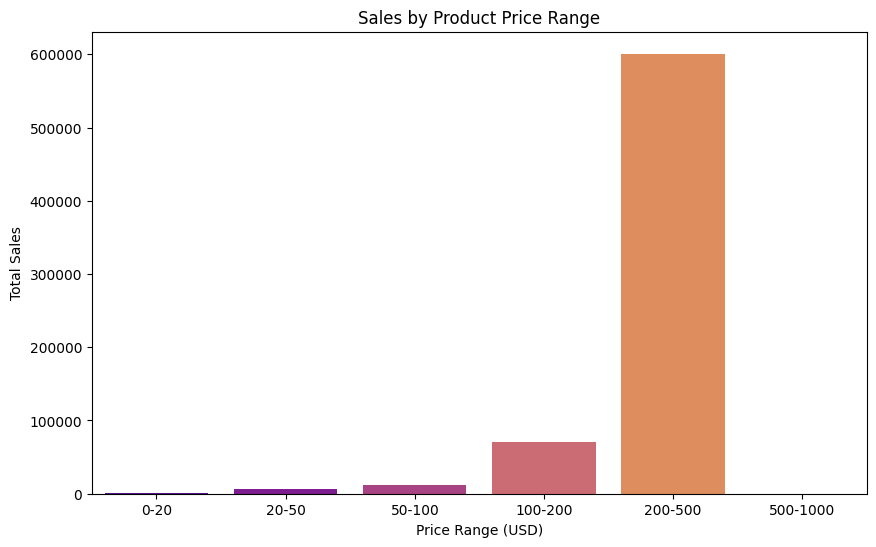

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=price_range_sales.index, y=price_range_sales.values, palette='plasma')
plt.title('Sales by Product Price Range')
plt.xlabel('Price Range (USD)')
plt.ylabel('Total Sales')
plt.show()